In [1]:
# Using python Nonlinear Programming Function scipy minimize to find the optimum solution of
# the Minimum Weight Tubular Column Problem
# Formulation 1

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Defining function
from numpy import pi

def fun(x):
  roh = 7833
  l = 5
  f = 2*roh*l*pi*x[0]*x[1]
  return f

In [3]:
#Initial design values and lower and upper bounds
x = np.array([0.01, 1]) # x =[t R]
vlb = np.array([0.001, 0.01])
vub = np.array([0.05,    0.1575])

In [4]:
## Defining constraints
cons = ({'type': 'ineq', 'fun': lambda x: 248e6 - 10e6 /(2*pi*x[0]*x[1]) },
        {'type': 'ineq', 'fun': lambda x: pi**3*207e9*x[1]**3*x[0]/(4*5**2) - 10e6 })

In [5]:
#Initial design values
x = (0.01, 0.1) # x =[t R]
## Defining bounds
bnds = ((0.001, 0.05),(0.01, 0.1575))

In [6]:
## Defining optimizer 
res = minimize(fun, x, method='SLSQP', bounds=bnds,
               constraints=cons)

In [7]:
res.x

print(cons[0]['fun'](res.x))

22460824.135177135


In [8]:
x = np.linspace(0, 0.25, 50)
y = np.linspace(0, 0.25, 50)

X, Y = np.meshgrid(x, y)
Z = fun([X, Y])

/Users/vispikarkaria/opt/anaconda3/envs/py33/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/vispikarkaria/opt/anaconda3/envs/py33/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == "__main__":


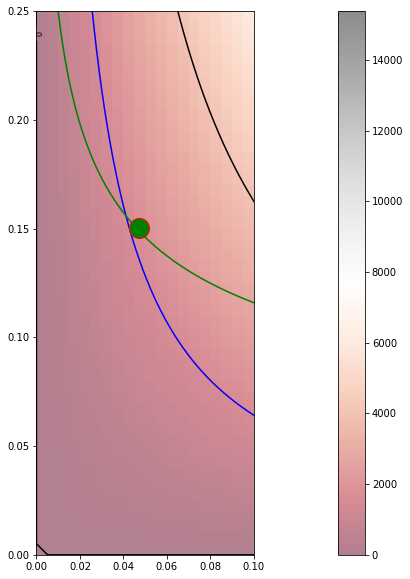

In [14]:
# Visualization 
# Plotting the constraint g1
fig, ax = plt.subplots(figsize=(30, 10))

#Plotting the constraint g1
x = np.linspace(0, 0.25, 1000)
ax.plot(x, 10*1e6/(2*3.1415*x*248*1e6), color='blue')
#Plotting the constraint g2
ax.plot(x, (10*1e6*4*5**2/(3.1415**3*207*1e9*x))**(1/3), color='green')
plt.ylim(0, 0.25)
plt.xlim(0, 0.1)

##Plotting contour
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 0.25, 0, 0.25], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

## Plotting optimal point
plt.plot(res.x[0], res.x[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.show()
